### Podatkovno rudarjenje, 1. domača naloga, VPIŠI DATUM ODDAJE

# Priprava podatkov, osnovne statistike in vizualizacija

**Ime in priimek** **VPIŠI !!!**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: 
https://github.com/PR-ULFRI/dn19-1-vašeuporabniškoime/n1_priprava_pregled.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatki so v mapi `/podatki/ml-latest-small`.

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [43]:
from csv import DictReader
from collections import Counter


ratings = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
movies = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))

ar = {} # key: movieId, value: all ratings for that id
mov = {} # key: movieId, value: title
passOne = {}

for row in movies:
    movId = row["movieId"]
    title = row["title"]
    genres = row["genres"]
    if movId not in mov:
        mov[movId] = title
    
for row in ratings:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    if movie not in ar:
        ar[movie] = []
    ar[movie].append(float(rating))

mostRated = 0

for key, values in ar.items():
    if (len(values) > mostRated):
        mostRated = len(values)
    passOne[key]=float("{0:.3f}".format(sum(values)/len(values)))
    


c = Counter(passOne)
top = c.most_common(10)

for i in top:
    print(mov.get(i[0])," : ",i[1])
    
    
    
'''
Problem je, da imajo nekateri filmi visoko povprečno oceno, vendar imajo malo število ogledov/ocen.
Tega se lahko rešimo z normalizacijo. Seštevek vseh ocen bomo delili s številom ocen najbolj ocenjenega filma.
'''   

print("\nZ normalizacijo\n")

passTwo = {}

for key, values in ar.items():
    passTwo[key]=float("{0:.3f}".format(sum(values)/mostRated))
    
c = Counter(passTwo)
top = c.most_common(10)

for i in top:
    print(mov.get(i[0])," : ",i[1])

One Magic Christmas (1985)  :  5.0
Step Into Liquid (2002)  :  5.0
Art of War, The (2000)  :  5.0
Taste of Cherry (Ta'm e guilass) (1997)  :  5.0
King Is Alive, The (2000)  :  5.0
Innocence (2000)  :  5.0
Maelström (2000)  :  5.0
Seconds (1966)  :  5.0
Amazing Grace (2006)  :  5.0
Unvanquished, The (Aparajito) (1957)  :  5.0

Z normalizacijo

Shawshank Redemption, The (1994)  :  4.092
Forrest Gump (1994)  :  4.054
Pulp Fiction (1994)  :  4.044
Silence of the Lambs, The (1991)  :  3.689
Star Wars: Episode IV - A New Hope (1977)  :  3.603
Matrix, The (1999)  :  3.177
Schindler's List (1993)  :  3.079
Jurassic Park (1993)  :  2.978
Star Wars: Episode V - The Empire Strikes Back (1980)  :  2.905
Toy Story (1995)  :  2.805


Odgovor: **zapišite odgovor**

### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

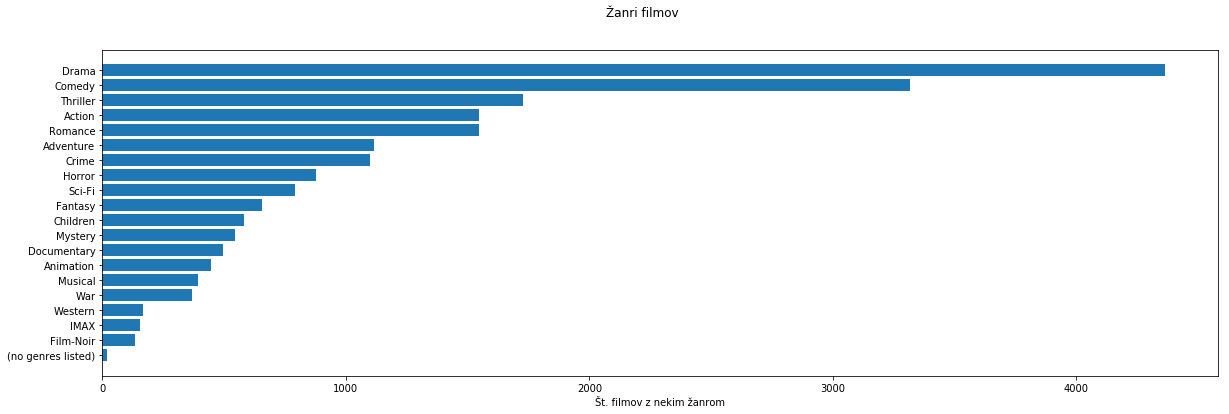

In [99]:
from csv import DictReader
import matplotlib.pyplot as mpl
import numpy as np

movies = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))
movGen = {} # key: genre, value: occurences

for row in movies:
    movId = row["movieId"]
    title = row["title"]
    genres = row["genres"].split("|")
    for genre in genres:
        if genre not in movGen:
            movGen[genre] = 0
        movGen[genre] += 1
        
'''Žanrov je 19, saj je ena od vrednosti (no genres listed)'''       


genre, count = zip(*sorted(list(zip(list(movGen.keys()), list(movGen.values()))), key=lambda tup: tup[1]))
#print(genre)
#print(count)

mpl.figure(figsize=(20,6))
mpl.barh(genre, count)
mpl.suptitle("Žanri filmov")
mpl.xlabel("Št. filmov z nekim žanrom")
mpl.show()




Odgovor: **zapišite odgovor**

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

In [1]:
from csv import DictReader
from collections import Counter


ratings = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
movies = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))

ar = {} # key: movieId, value: all ratings for that id
mov = {} # key: movieId, value: title
passOne = {}

for row in movies:
    movId = row["movieId"]
    title = row["title"]
    genres = row["genres"]
    if movId not in mov:
        mov[movId] = title
    
for row in ratings:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    if movie not in ar:
        ar[movie] = []
    ar[movie].append(float(rating))

mostRated = 0

#povprečne ocene bom izračunal z normalizacijo kot pri prvi nalogi

passTwo = {}

for key, values in ar.items():
    passTwo[key]=float("{0:.3f}".format(sum(values)/mostRated))
    
c = Counter(passTwo)
top = c.most_common(10)

for i in top:
    print(mov.get(i[0])," : ",i[1])

Odgovor: **zapišite odgovor**

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

Odgovor: **zapišite odgovor**

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

Odgovor: **zapišite odgovor**

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite odgovor**

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [1]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [2]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [3]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'